In [21]:
# General Libs
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
im_shape = (299,299)

TRAINING_DIR = './MY_data/train'
TEST_DIR = './MY_data/test'

seed = 10

BATCH_SIZE = 16

In [23]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        preprocessing_function=preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [24]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.
Classes: ['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']


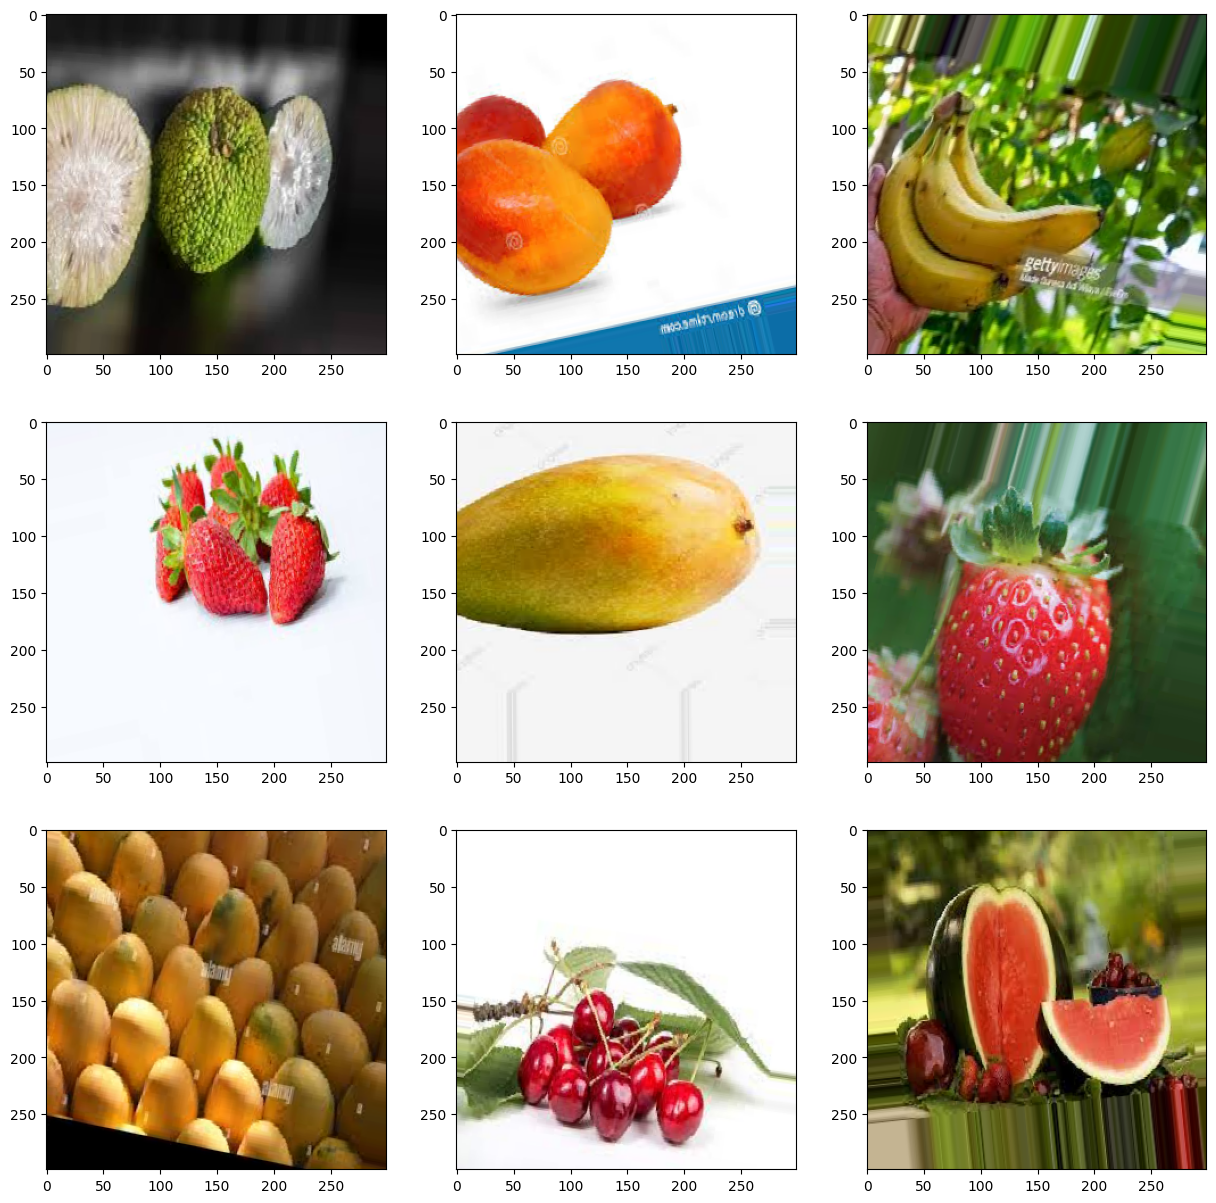

In [31]:
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = (next(train_generator)[0]+1)/2*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()


In [32]:
base_model = InceptionResNetV2(weights='imagenet',include_top=False, input_shape=(im_shape[0], im_shape[1], 3))

x = base_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax', kernel_initializer='random_uniform')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freezing pretrained layers
base_model.trainable = False

optimizer = Adam()
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
epochs = 50

# Saving the best model
callbacks_list = [
    ModelCheckpoint(
        filepath='model7.keras',
        monitor='val_loss', 
        save_best_only=True, 
        verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

# Definir una función de callback personalizada para imprimir los logs
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            print("Epoch:", epoch, "Logs:", logs)

# Agregar la función de callback personalizada a la lista de callbacks
callbacks_list.append(CustomCallback())

# Entrenar el modelo con los nuevos callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // BATCH_SIZE,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/50


c:\Users\kev24\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5809 - loss: 1.9228
Epoch 1: val_loss improved from inf to 0.45341, saving model to model7.keras
Epoch: 0 Logs: {'accuracy': 0.7095890641212463, 'loss': 1.116950273513794, 'val_accuracy': 0.8772321343421936, 'val_loss': 0.4534134566783905}
115/115 ━━━━━━━━━━━━━━━━━━━━ 368s 3s/step - accuracy: 0.5820 - loss: 1.9158 - val_accuracy: 0.8772 - val_loss: 0.4534
Epoch 2/50
  1/115 ━━━━━━━━━━━━━━━━━━━━ 4:09 2s/step - accuracy: 0.5625 - loss: 1.2717

c:\Users\kev24\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss did not improve from 0.45341
Epoch: 1 Logs: {'accuracy': 0.5625, 'loss': 0.6358454823493958, 'val_accuracy': 0.5833333134651184, 'val_loss': 0.5341756939888}
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5625 - loss: 0.6414 - val_accuracy: 0.5833 - val_loss: 0.5342
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8165 - loss: 0.6239
Epoch 3: val_loss improved from 0.45341 to 0.28943, saving model to model7.keras
Epoch: 2 Logs: {'accuracy': 0.8323287963867188, 'loss': 0.5690594911575317, 'val_accuracy': 0.90625, 'val_loss': 0.28943318128585815}
115/115 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.8167 - loss: 0.6235 - val_accuracy: 0.9062 - val_loss: 0.2894
Epoch 4/50
  1/115 ━━━━━━━━━━━━━━━━━━━━ 4:06 2s/step - accuracy: 0.8750 - loss: 0.4727
Epoch 4: val_loss improved from 0.28943 to 0.28739, saving model to model7.keras
Epoch: 3 Logs: {'accuracy': 0.875, 'loss': 0.2363455891609192, 'val_accuracy': 0.75, 'val_loss': 0.2873891592025757}
11

In [4]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [26]:
from keras.models import load_model

# Cargar el modelo en formato .keras
model_keras = load_model('model7.keras', compile=False)
model_keras.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [27]:
score = model_keras.evaluate(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])



c:\Users\kev24\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9279 - loss: 0.1887
Val loss: 0.23706208169460297
Val accuracy: 0.917391300201416


In [28]:
# Utilizando el conjunto de datos de prueba
score = model_keras.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



65/65 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5580 - loss: 4.1402
Test loss: 2.5436794757843018
Test accuracy: 0.6819512248039246


In [29]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
# %%
import requests
from PIL import Image
from io import BytesIO
import numpy as np
from tensorflow.keras.preprocessing import image

65/65 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step
Classification Report
              precision    recall  f1-score   support

       Apple       0.81      0.88      0.84        89
      Banana       0.00      0.00      0.00       105
     avocado       0.00      0.00      0.00       106
      cherry       0.84      0.90      0.87       105
        kiwi       0.82      0.90      0.86       105
       mango       0.83      0.50      0.63       105
      orange       0.85      0.94      0.89        97
  pinenapple       1.00      0.93      0.97       105
strawberries       0.92      0.95      0.93       103
  watermelon       0.80      0.89      0.84       105

    accuracy                           0.68      1025
   macro avg       0.69      0.69      0.68      1025
weighted avg       0.68      0.68      0.68      1025



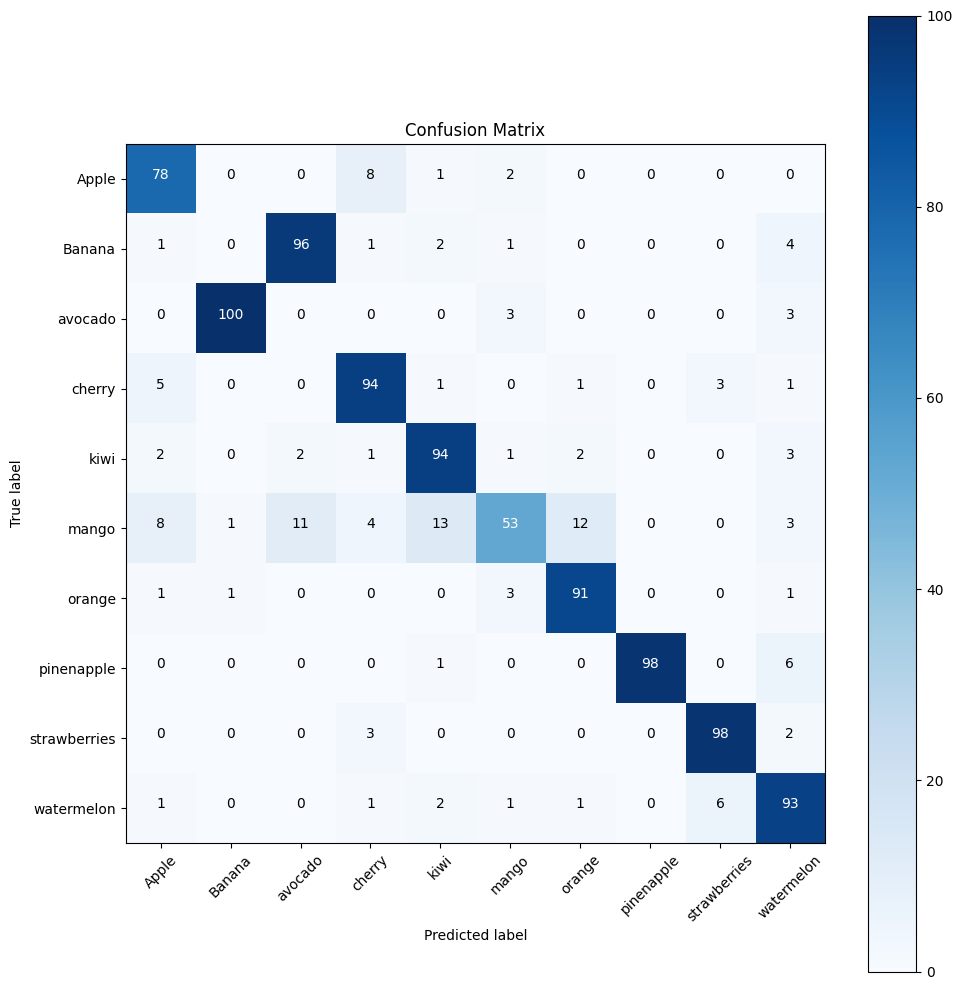

In [32]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predicciones utilizando el conjunto de datos de prueba
Y_pred = model_keras.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

# Matriz de confusión
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


In [34]:
# Función para cargar y preprocesar la imagen desde un enlace
def load_and_preprocess_image(url, target_size):
    # Descargar la imagen desde el enlace
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # Redimensionar la imagen al tamaño objetivo
    img = img.resize(target_size)
    # Convertir la imagen a un arreglo numpy
    img_array = image.img_to_array(img)
    # Agregar una dimensión adicional para el lote (batch)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalizar los valores de píxeles al rango [0, 1]
    img_array = img_array / 255.0
    
    # Realizar la predicción utilizando el modelo
    prediction = model_keras.predict(img_array)
    # Obtener el índice de la clase predicha
    predicted_class = np.argmax(prediction)
    
    # Obtener el nombre del objeto predicho y su porcentaje de confianza
    class_names = ["manzana", "banana","aguacate", "cereza", "kiwi", "mango", "naranja", "piña", "fresa", "sandía"]
    predicted_class_name = class_names[predicted_class]
    confidence_percent = prediction[0][predicted_class] * 100
    
    # Imprimir el nombre del objeto predicho y su porcentaje de confianza
    print("Objeto predicho:", predicted_class_name)
    print("Porcentaje de confianza:", confidence_percent)
    
    return img_array

# URL de la imagen de prueba
image_url = "https://th.bing.com/th/id/OIG3.75Sbf6IXJkaA.zlJFlxO?w=1024&h=1024&rs=1&pid=ImgDetMain"
# Tamaño objetivo de la imagen
target_size = (299, 299)

# Cargar y preprocesar la imagen
test_image = load_and_preprocess_image(image_url, target_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Objeto predicho: banana
Porcentaje de confianza: 99.9810516834259
